### PUBG
<p>In this notebook, I’ll be analyzing PUBG game dataset, which is an online battle game,
In a PUBG game, up to 100 players start in each match. Players can be on teams that get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In-game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves. Let's start the EDA and see insight of the data.

**Data fields**
1. DBNOs - Number of enemy players knocked.
2. assists - Number of enemy players this player damaged that were killed by teammates.
3. boosts - Number of boost items used.
4. damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
5. headshotKills - Number of enemy players killed with headshots.
6. heals - Number of healing items used.
7. Id - Player’s Id
8. killPlace - Ranking in match of number of enemy players killed.
9. killPoints - Kills-based external ranking of players. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
10. killStreaks - Max number of enemy players killed in a short amount of time.
11. kills - Number of enemy players killed.
12. longestKill - Longest distance between player and player killed at time of death. This may be 15. misleading, as downing a player and driving away may lead to a large longestKill stat.
13. matchDuration - Duration of match in seconds.
14. matchId - ID to identify matches. There are no matches that are in both the training and testing set.
15. matchType - String identifying the game mode that the data comes from. The standard modes are 18. “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
16. rankPoints - Elo-like ranking of players. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes the place of “None”.
17. revives - Number of times this player revived teammates.
18. rideDistance - Total distance traveled in vehicles measured in meters.
19. roadKills - Number of kills while in a vehicle.
20. swimDistance - Total distance traveled by swimming measured in meters.
21. teamKills - Number of times this player killed a teammate.
22. vehicleDestroys - Number of vehicles destroyed.
23. walkDistance - Total distance traveled on foot measured in meters.
24. weaponsAcquired - Number of weapons picked up.
25. winPoints - Win-based external ranking of players. (Think of this as an Elo ranking where only 28. winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
26. groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
27. umGroups - Number of groups we have data for in the match.
28. maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
29. winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.
    



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
Data = pd.read_csv("data.csv", index_col = 0)

In [3]:
Data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [4]:
pd.set_option('display.max_columns', None)
Data.set_index("Id" ,inplace=True)
Data.head(5)

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,1437,0,0,0.000,1403,squad-fpp,31,29,-1,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,1225,0,0,0.000,1971,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,0,0,0,0.000,1741,solo-fpp,96,89,1516,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,1286,0,0,0.000,1738,squad-fpp,28,27,-1,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,0,1,1,7.737,2193,solo,99,95,1482,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [5]:
data = Data.copy()

In [6]:
print("Row,Column:",data.shape)
print("Total Null Values:", data.isnull().sum().sum())

Row,Column: (1111742, 28)
Total Null Values: 1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1111742 entries, a3e3cea9f2e314 to 9beb0064c56445
Data columns (total 28 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   groupId          1111742 non-null  object 
 1   matchId          1111742 non-null  object 
 2   assists          1111742 non-null  int64  
 3   boosts           1111742 non-null  int64  
 4   damageDealt      1111742 non-null  float64
 5   DBNOs            1111742 non-null  int64  
 6   headshotKills    1111742 non-null  int64  
 7   heals            1111742 non-null  int64  
 8   killPlace        1111742 non-null  int64  
 9   killPoints       1111742 non-null  int64  
 10  kills            1111742 non-null  int64  
 11  killStreaks      1111742 non-null  int64  
 12  longestKill      1111742 non-null  float64
 13  matchDuration    1111742 non-null  int64  
 14  matchType        1111742 non-null  object 
 15  maxPlace         1111742 non-null  int64  
 16  num

In [8]:
data[data["winPlacePerc"].isnull()]

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [9]:
data=data.dropna(inplace=False)
data = data.drop(['groupId','matchId'], axis=1)

In [10]:
data.shape

(1111741, 26)

### Let's see some univariate analysis

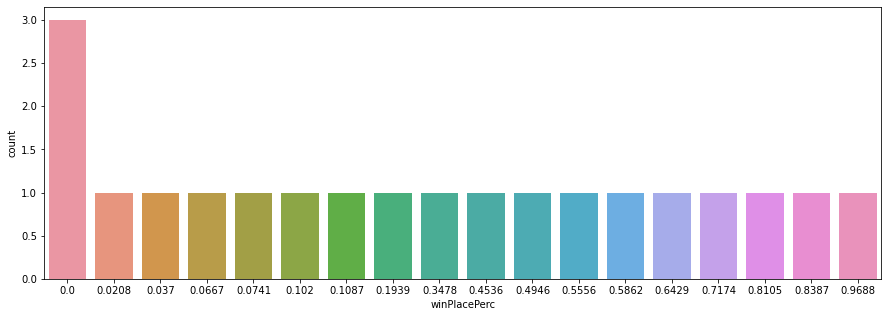

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(data['winPlacePerc'][:20])
plt.show()

In [12]:
data[data['rankPoints']== -1][[ "winPoints", "rankPoints", "killPoints"]]

,winPoints,rankPoints,killPoints
Id,,,
a3e3cea9f2e314,1525,-1,1437
43e4be7ad72cc7,1516,-1,1225
b147e1bd448fc4,1515,-1,1286
cf3fc190ef0636,1500,-1,1000
681756a82a8567,1489,-1,993
...,...,...,...
0ca2712cb43a9c,1498,-1,1125
fafc64c04afc15,1502,-1,988
e78e5ff96a9780,1467,-1,1142


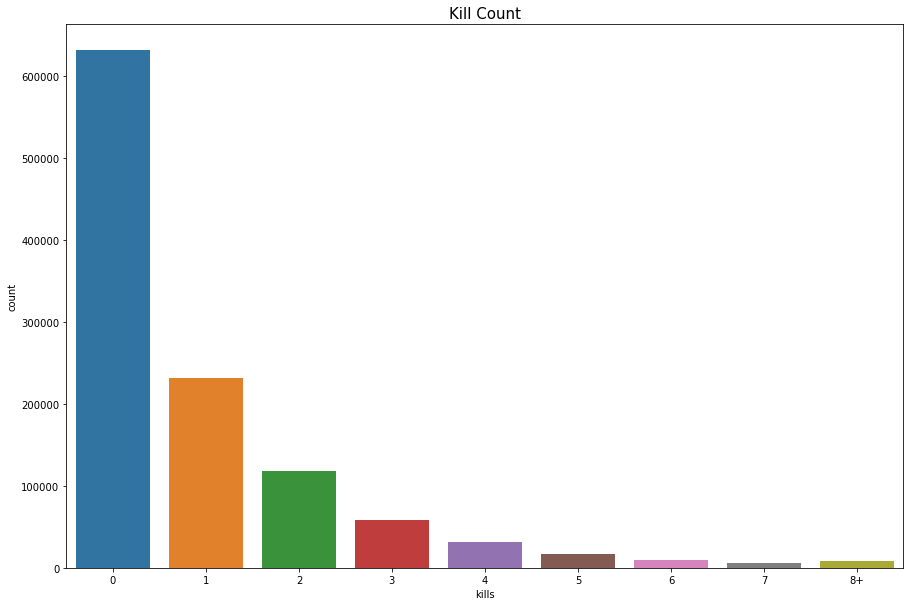

In [13]:
temp_data = data.copy()
temp_data.loc[temp_data['kills'] > temp_data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(temp_data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

#### Here you see 0 kills are the heighest (for fun we can say it's Noob), and 8+ kills are the minimum, hence it is very difficult to kill 8+ player in the battlefield.

#### But wait now we will goin to see the number of people winning the game without killing single person

In [29]:
# Winners without killing
len(data[(data.kills == 0) & (data.winPlacePerc == 1)])

4197

#### See there are 4197 people who didn't even have a single kill but won the match

#### Now lets see how many numbers of people plays in a solo match and won the match without killing any one.

In [31]:
len(data[(data.kills == 0) & (data.winPlacePerc == 1) & (data.numGroups > 50)])

3

#### Now we can see only 3 people played solo match and rest of the others won because of there squad

<AxesSubplot:xlabel='matchType', ylabel='count'>

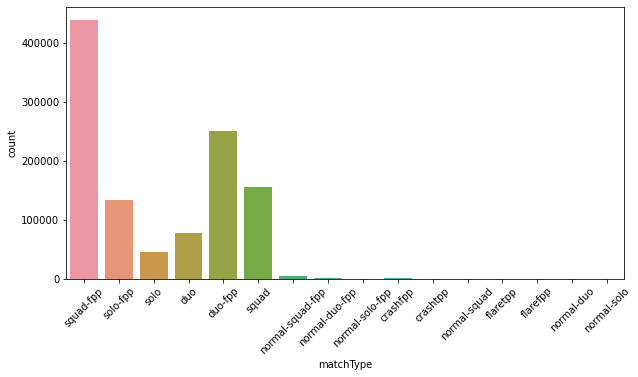

In [14]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.countplot(data['matchType'].astype('str'))

### Most of the players plays as squad "4members"

let's check the matchType further

In [15]:
data['matchType'].value_counts()

squad-fpp           438781
duo-fpp             249927
squad               156573
solo-fpp            133853
duo                  78039
solo                 45679
normal-squad-fpp      4286
crashfpp              1581
normal-duo-fpp        1400
flaretpp               633
normal-solo-fpp        465
flarefpp               180
normal-squad           135
crashtpp                86
normal-solo             75
normal-duo              48
Name: matchType, dtype: int64

Combine all squad types into 1 column Squad, same for solo, duo other will be combined in others

In [16]:
data.matchType.replace(['squad-fpp','squad','normal-squad-fpp','normal-squad'],'Squad',inplace=True)
data.matchType.replace(['duo-fpp','duo','normal-duo-fpp','normal-duo'],'Duo',inplace=True)
data.matchType.replace(['solo-fpp','solo','normal-solo-fpp','normal-solo'],'Solo',inplace=True)
data.matchType.replace(['crashfpp','flaretpp','flarefpp','crashtpp'],'Othertypes',inplace=True)

<AxesSubplot:>

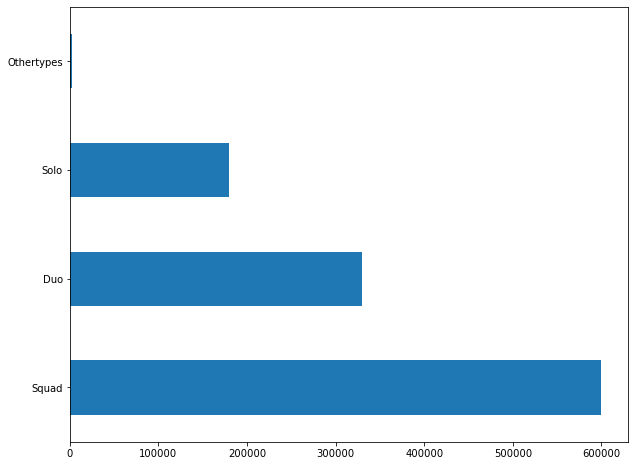

In [17]:
plt.figure(figsize = (10,8))
data['matchType'].value_counts().plot(kind='barh')

#### Here we can see the most number of matches plays as Squad and second is plays as Dua , Yes Solo is little bit boring

 Lets see the headshots 

In [33]:
print("{:.2f}% of kills are headshot kills.".format(data.headshotKills.sum()/data.kills.sum() * 100))

24.49% of kills are headshot kills.


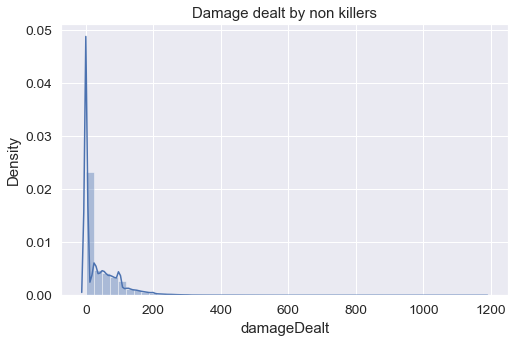

In [37]:
damg = data.copy()
damg =damg[damg['kills']==0]
plt.figure(figsize=(8,5))
sns.distplot(damg['damageDealt'])
plt.title('Damage dealt by non killers')
plt.show()

* Most of them couldn't even do damage.
* those who deal zero damage didn't even find a weapon, which means they were most likely killed at the beginning of the game.

#### lets see the people who didn't got the single  weapon and got killed

In [41]:
len(data[(data["weaponsAcquired"] == 0) & (data.damageDealt == 0) & (data.kills == 0)])

61510

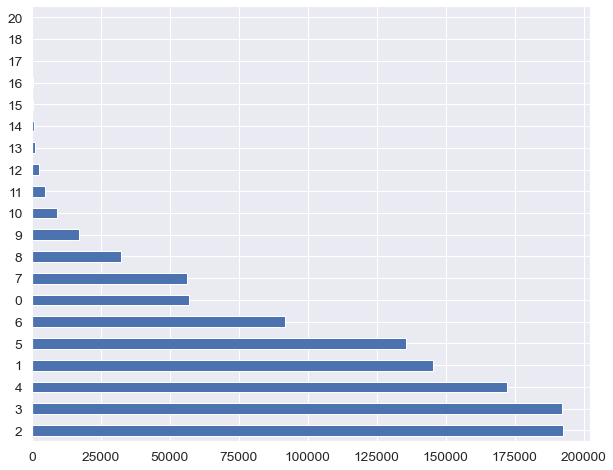

In [49]:
plt.figure(figsize = (10,8))
data['weaponsAcquired'].value_counts()[:20].plot(kind='barh')
plt.show()

#### Most of the people aquired 2 and 3 weapons 

#### Lets see the number of people who got more than 12 weapons

In [54]:
len(data[(data["weaponsAcquired"] > 10)])

10844

I think they are happy to play with many weapons

In [60]:
len(data[(data["weaponsAcquired"] > 10) & (data.damageDealt == 0) & (data.kills == 0)])

1649

see the conversion rate

### Lets do bivariate and multivariate analyses 

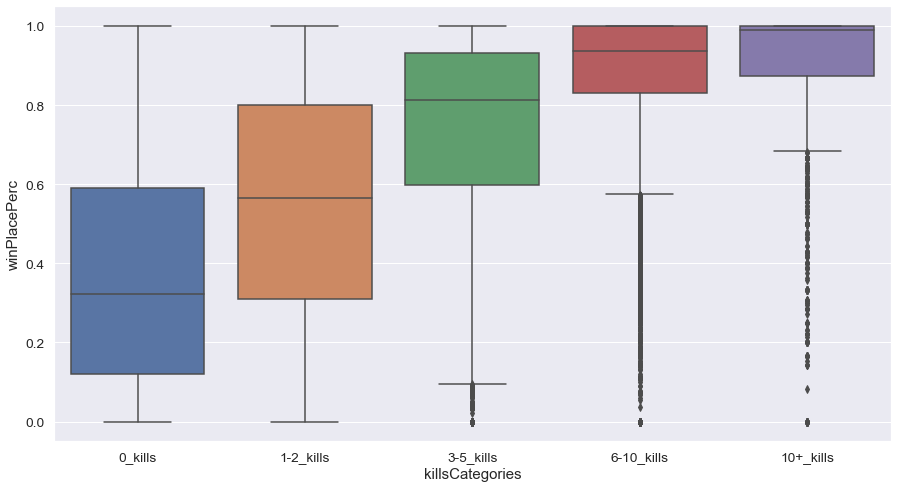

In [61]:
kills = data.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

The chance of winning is directly propotion to rate of kills.
* The more numbers of kills, the more chance to win the game.

### Lets see the relation between walking and winning the game

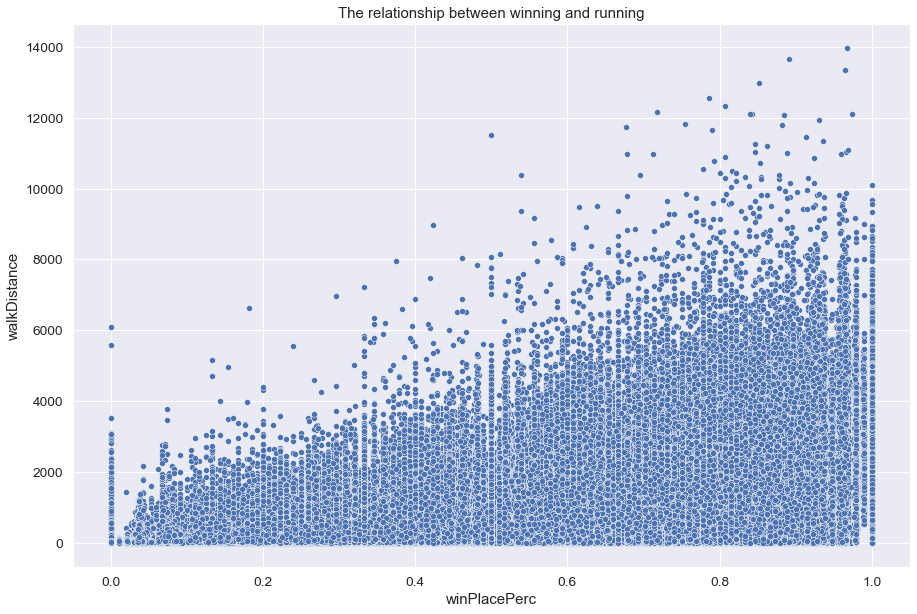

In [63]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='winPlacePerc',y='walkDistance',data=data)
plt.title('The relationship between winning and running')
plt.show()

Yes, obvious more you have the walk distance, more chances to get win

<AxesSubplot:xlabel='walkDistance', ylabel='winPlacePerc'>

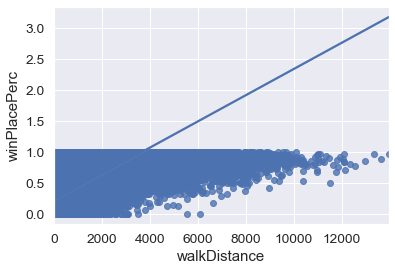

In [70]:
sns.regplot(x='walkDistance', y='winPlacePerc', data=data)

In PUBG when any of the teammate get knock out, you can revive him/her. lets check the chance of 
winning the match when someone's revive in team.

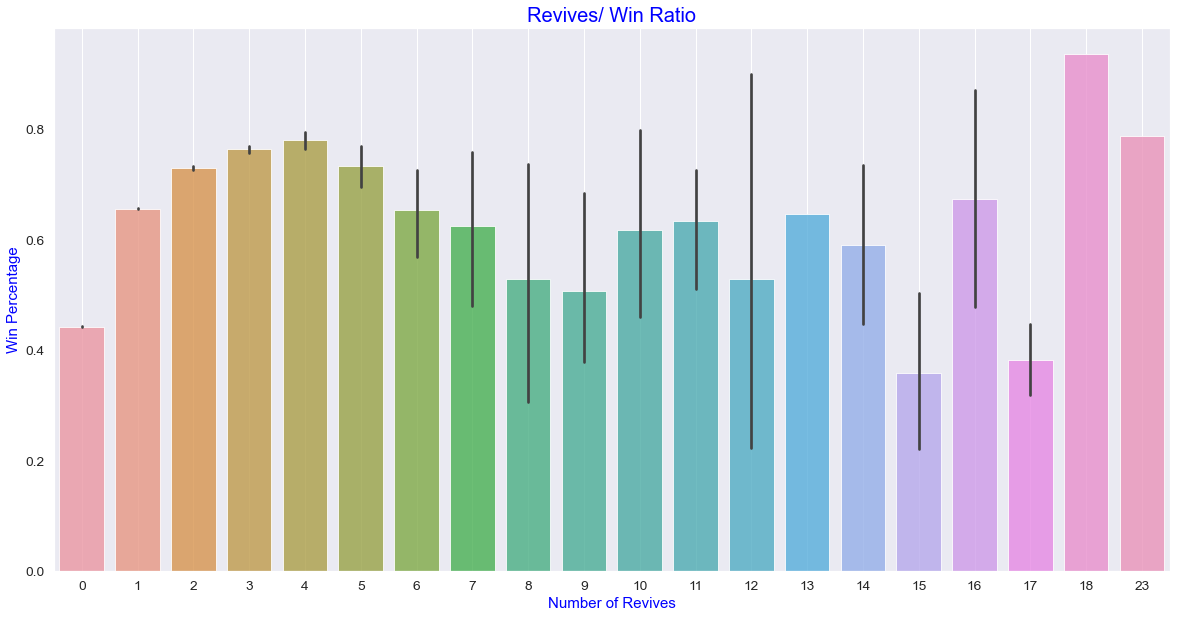

In [65]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.barplot(x='revives',y='winPlacePerc',data=data,alpha=0.8)
plt.xlabel('Number of Revives',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Revives/ Win Ratio',fontsize = 20,color='blue')
plt.grid();

It not seem so much effective 

Player can kill an enemy or whole team by destroyng the enemy's vehicle with weapon or bomb.

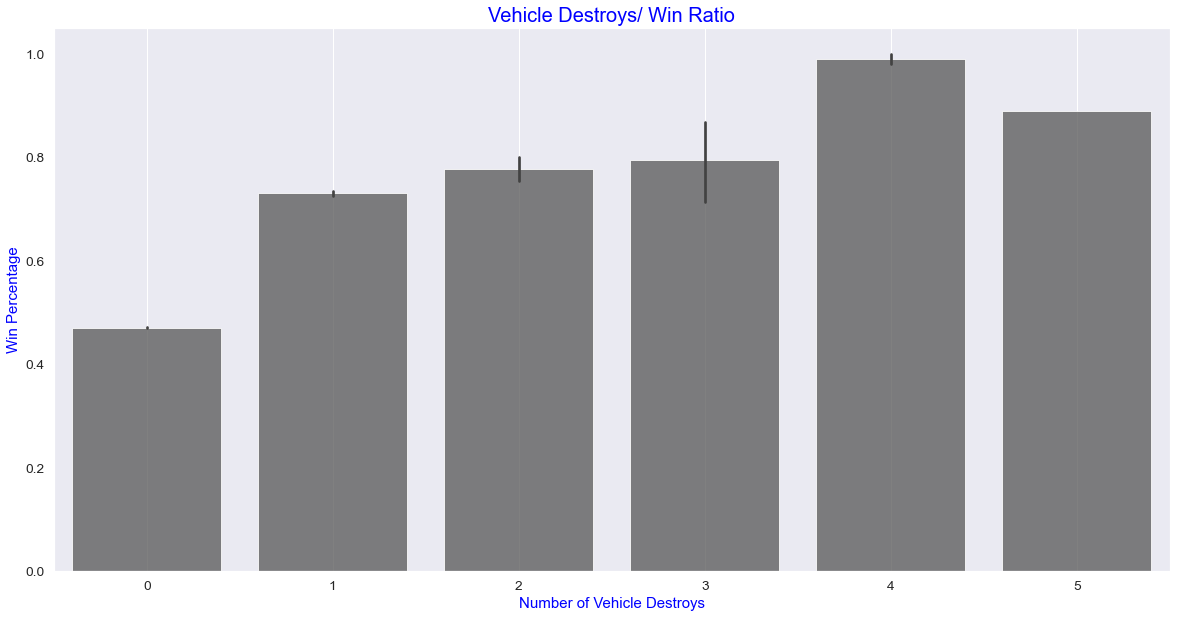

In [68]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.barplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid()

It shows that destroying the number of vehicle increases the chance of winning 

<AxesSubplot:xlabel='vehicleDestroys', ylabel='winPlacePerc'>

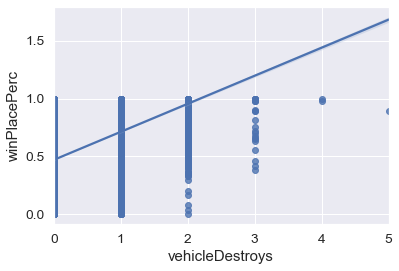

In [69]:
sns.regplot(x='vehicleDestroys', y='winPlacePerc', data=data)

#### Let's see the correlation between the data

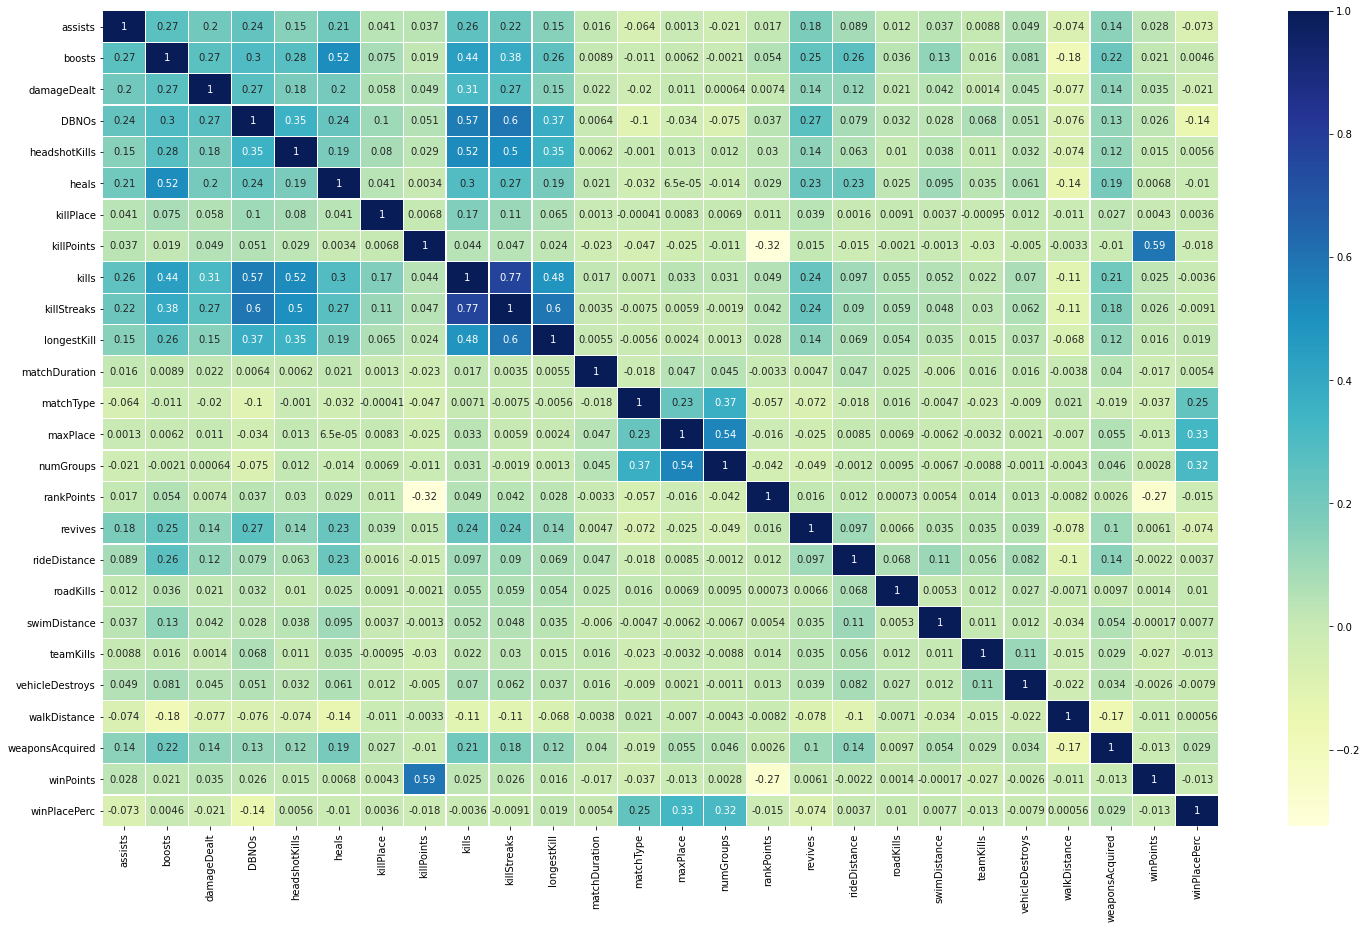

In [19]:
plt.figure(figsize=(25,15 ))
mask = np.array(data.corr())
mask[np.tril_indices_from(mask)]=False
#df1 = data.drop('income',axis=1)
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, annot=True,yticklabels=corr.columns, 
                 linewidths=.2,cmap="YlGnBu")

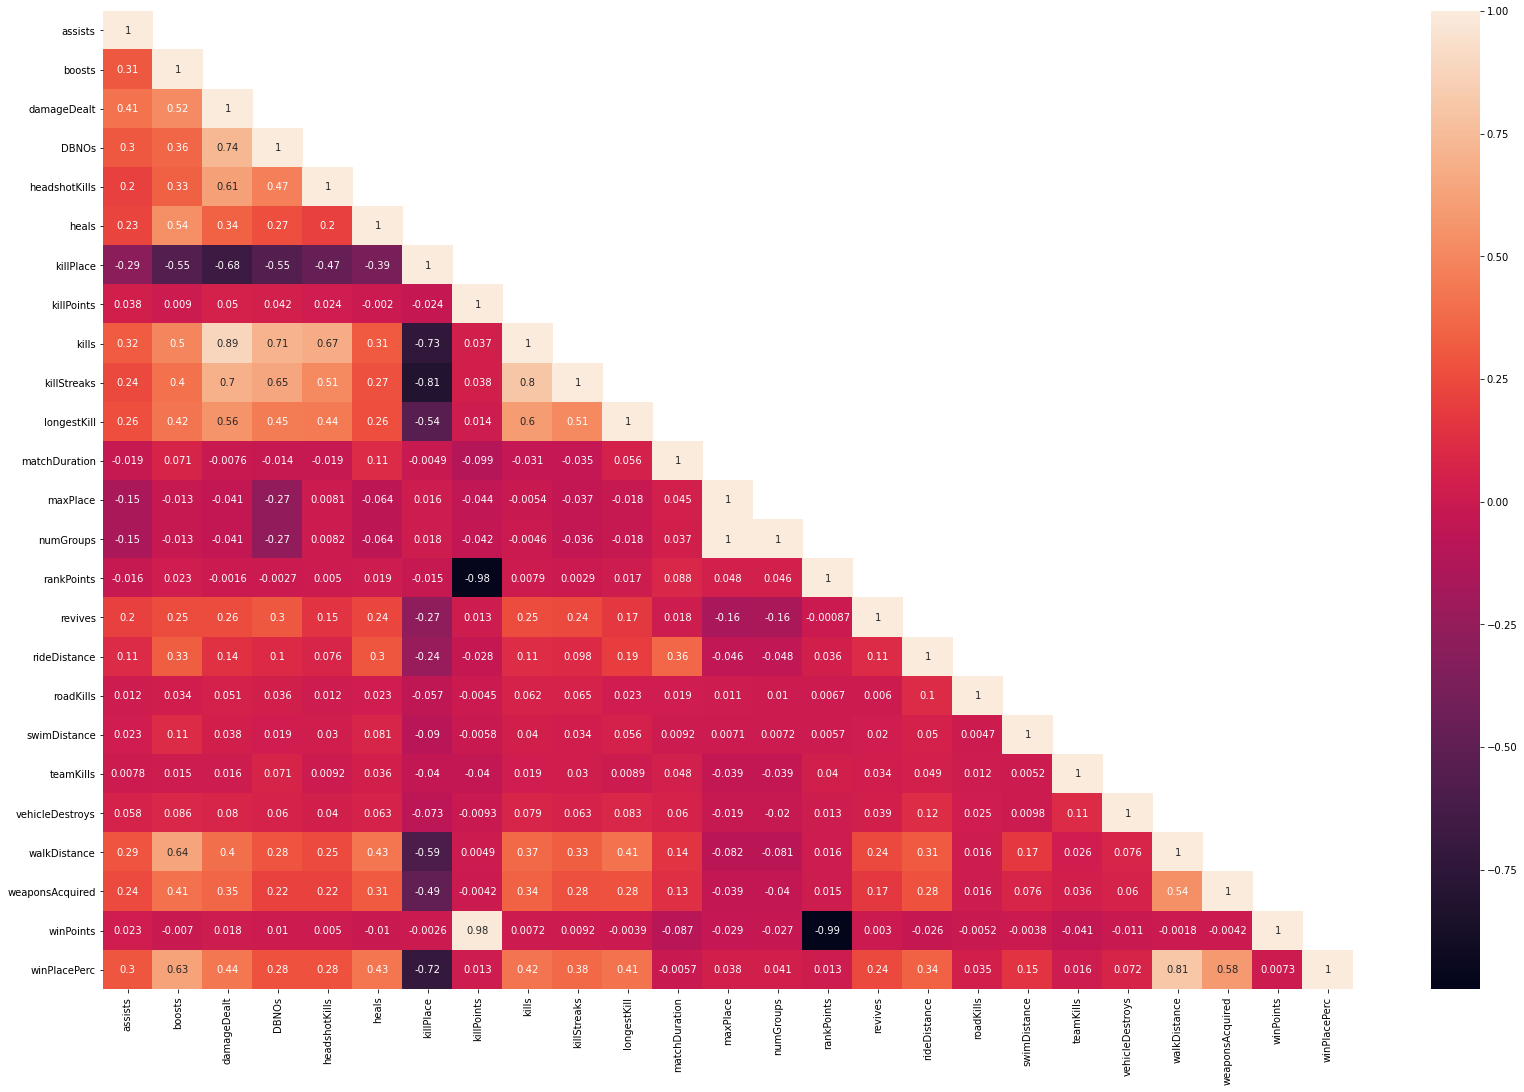

In [20]:
plt.figure(figsize =(28,18))
mask = np.array(data.corr())
mask[np.tril_indices_from(mask)]=False
sns.heatmap(data.corr(), mask = mask, annot =True)
plt.show()

###  Heat Map Inference 

DBNOs(Number of players knocked)
1. DBNOs, Headshot kills, Kills, kills streak and longest kill are positive correlated with Damage Delt.
2. Kills and Kills Streak are positively correlated with DBNOs.
3. Win points have heighest positive correalation with kills point (98% correlation) .
4. As you can see the walk distance is heigh positively correlated win winplaceper (The more your distance, heigher the chance of win).
5. Boost and weapon acquire are also correlated with WinPlacePer

Note - So I guess next time you taking care about your longest survive, boost and weapon you have to increase the chances for your winning

### There are many attributes that have little corr values with the target variable..let's choose the top 5 attributes and explore them further,it's also to be noticed that the least correlated feature is the kill place

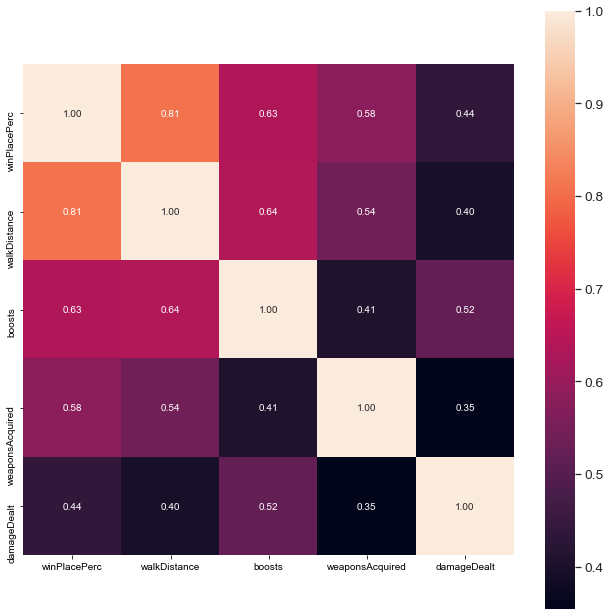

In [21]:
f,ax = plt.subplots(figsize=(11, 11))

cols = data.corr().nlargest(5, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Yes, it shows the hieghest possibilities of winning is depend upon the distance you walk, more you cover the distance, more possibilities of winning the game

$$End$$